In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
#OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class

# CH - Canopy Height (meters)
# ARVI - atmospherically resistant vegetation index
# EVI - enhanced vegetation index
# NDVI - normalized difference vegetation index
# SAVI - soil-adjusted vegetation index
# Veg_class - vegetation classification

In [3]:
df = pd.concat(map(pd.read_csv, ['SRER21_dataset_v1.csv', 'SRER_2017_training_bi.csv']), ignore_index=True)
print(df)

       OID_    Id  gridcode  Shape_Length  Shape_Area   CH_mean  ARVI_mean  \
0         2     2         2          20.4        2.38  1.000000   0.273945   
1         3     3         3           8.2        1.32  1.000000   0.530157   
2         4     4         4          55.8       24.43  0.920000   0.477979   
3         5     5         5          15.2        1.88  1.000000   0.342944   
4         6     6         6          27.2        9.29  0.142857   0.044382   
...     ...   ...       ...           ...         ...       ...        ...   
12101  4335  4487      4487           8.8        2.30  0.020000   0.290182   
12102  4336  4488      4488          10.8        2.03  0.020000   0.408320   
12103  4337  4489      4489          11.8        2.62  0.015000   0.413297   
12104  4338  4490      4490          11.2        3.09  0.015000   0.550652   
12105  4339  4491      4491          14.8        3.33  0.865000   0.484593   

       ARVI_med  ARVI_max  EVI_mean   EVI_med   EVI_max  NDVI_m

In [4]:
df.isnull().sum()
df.dropna(axis=0,inplace=True)

In [5]:
df.isnull().sum()

OID_            0
Id              0
gridcode        0
Shape_Length    0
Shape_Area      0
CH_mean         0
ARVI_mean       0
ARVI_med        0
ARVI_max        0
EVI_mean        0
EVI_med         0
EVI_max         0
NDVI_mean       0
NDVI_med        0
NDVI_max        0
SAVI_mean       0
SAVI_med        0
SAVI_max        0
Veg_class       0
dtype: int64

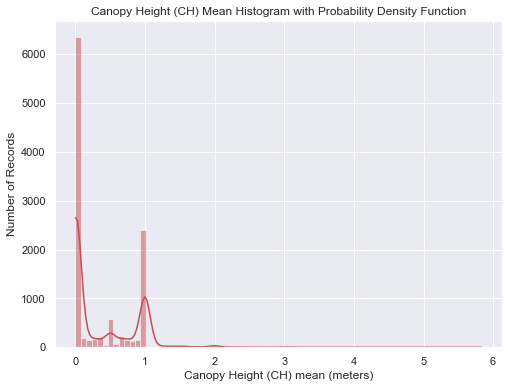

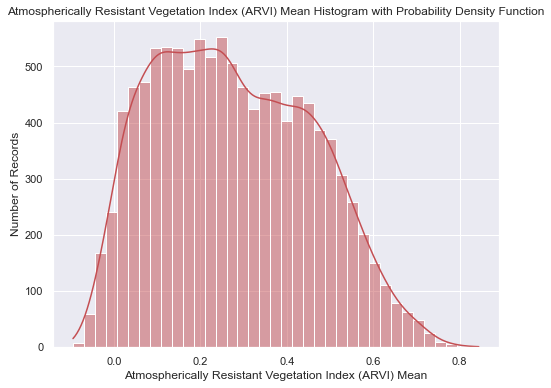

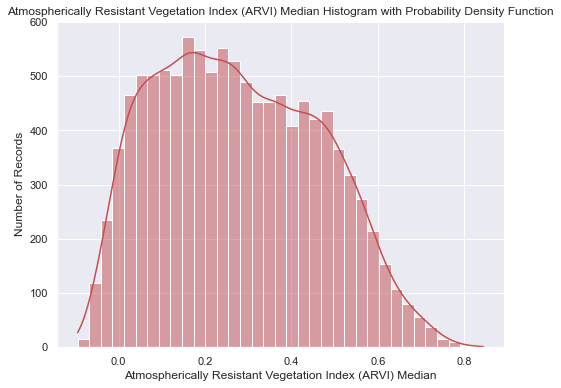

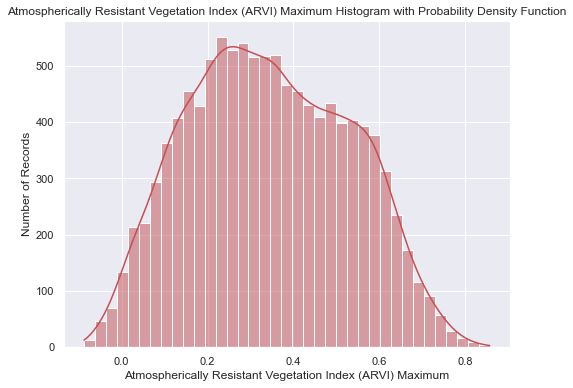

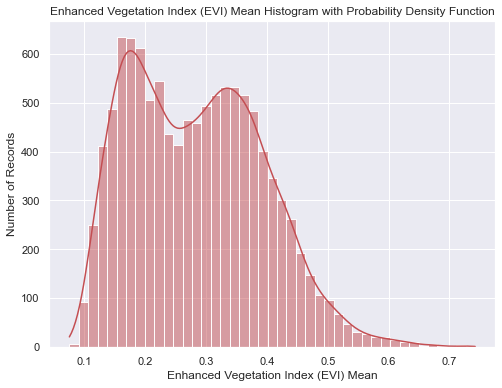

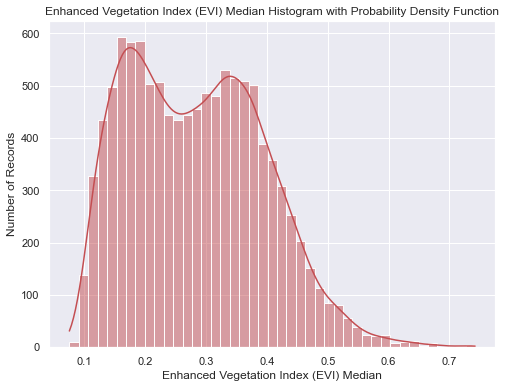

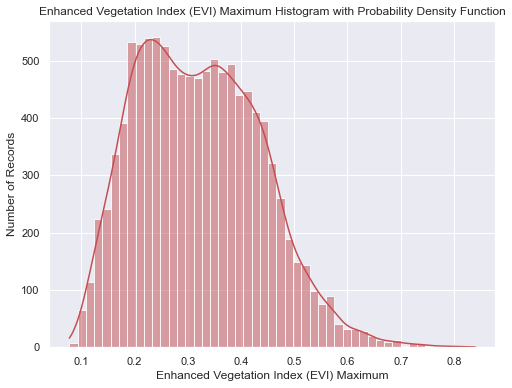

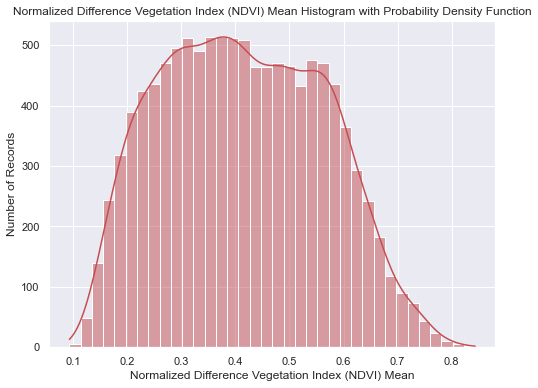

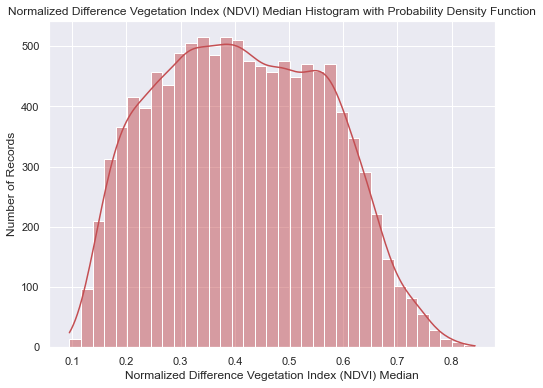

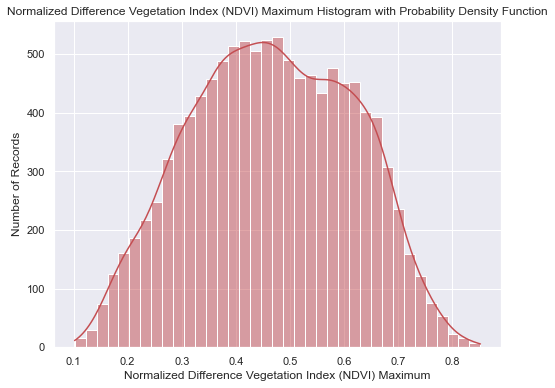

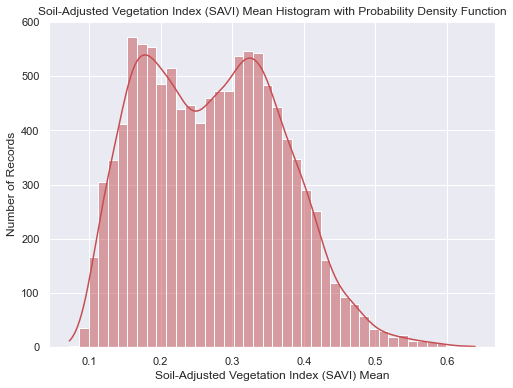

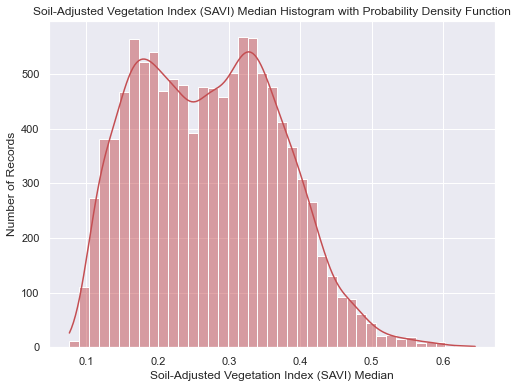

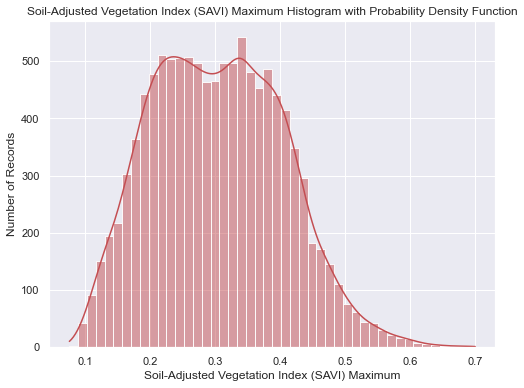

In [6]:
category = ["CH_mean","ARVI_mean","ARVI_med","ARVI_max","EVI_mean","EVI_med","EVI_max","NDVI_mean","NDVI_med","NDVI_max","SAVI_mean","SAVI_med","SAVI_max"]

for i in category:
    sns.set(rc={"figure.figsize":(15,8)})
    plt.figure(figsize=(8,6))
    sns.histplot(x=i,data=df,color="r",kde=True)
    plt.ylabel("Number of Records")
    if i == "CH_mean":
        plt.title("Canopy Height (CH) Mean Histogram with Probability Density Function")
        plt.xlabel("Canopy Height (CH) mean (meters)")
    if i == "ARVI_mean":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Mean")
    if i == "ARVI_med":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Median Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Median")
    if i == "ARVI_max":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Maximum")
    if i == "EVI_mean":
        plt.title("Enhanced Vegetation Index (EVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Mean")
    if i == "EVI_med":
        plt.title("Enhanced Vegetation Index (EVI) Median Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Median")
    if i == "EVI_max":
        plt.title("Enhanced Vegetation Index (EVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Maximum")
    if i == "NDVI_mean":
        plt.title("Normalized Difference Vegetation Index (NDVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Mean")
    if i == "NDVI_med":
        plt.title("Normalized Difference Vegetation Index (NDVI) Median Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Median")
    if i == "NDVI_max":
        plt.title("Normalized Difference Vegetation Index (NDVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Maximum")
    if i == "SAVI_mean":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Mean")
    if i == "SAVI_med":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Median Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Median")
    if i == "SAVI_max":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Maximum")

Text(0.5, 0, 'Vegetation Class')

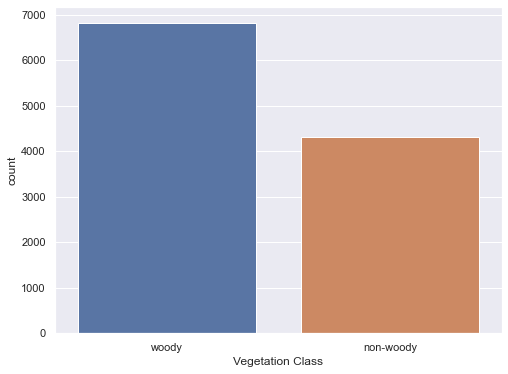

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x=df["Veg_class"])
plt.xlabel("Vegetation Class")

<AxesSubplot:>

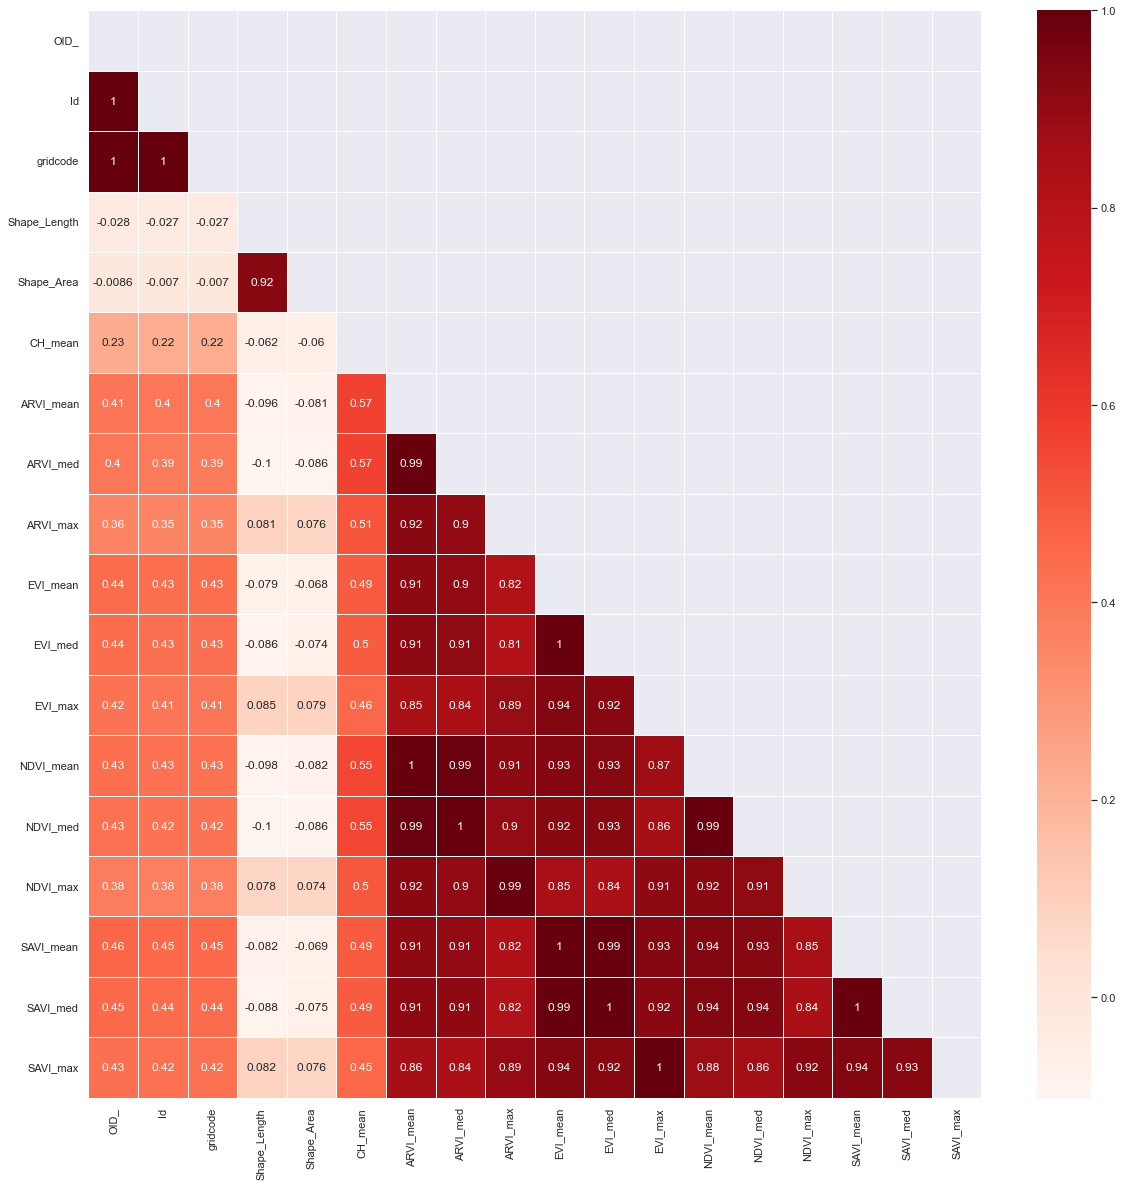

In [8]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
color = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95,as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap = "Reds", linewidths=.5,mask=mask)

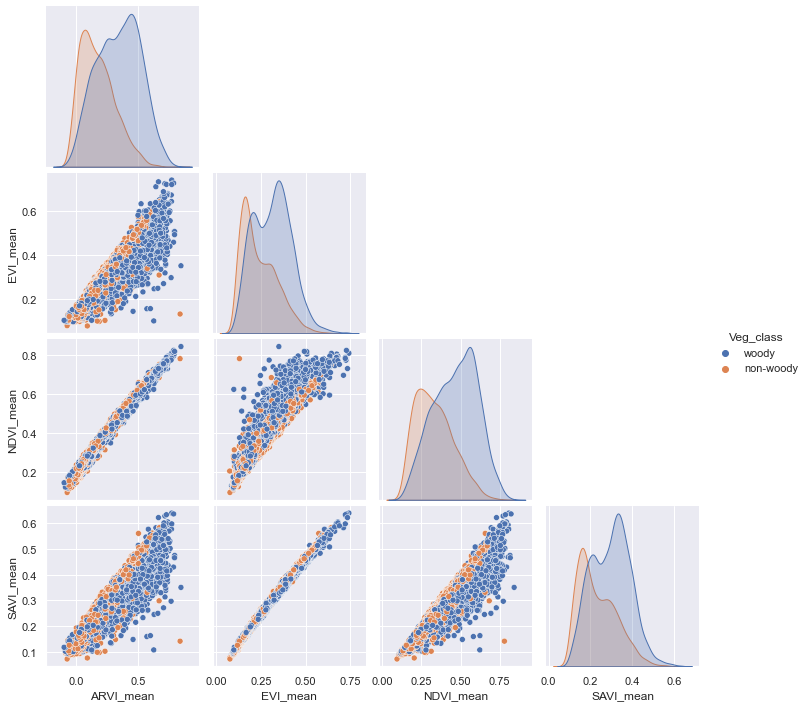

In [9]:
mewch = sns.pairplot(df, hue="Veg_class", x_vars = ["ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"], y_vars = ["ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"], corner = "True")

<AxesSubplot:>

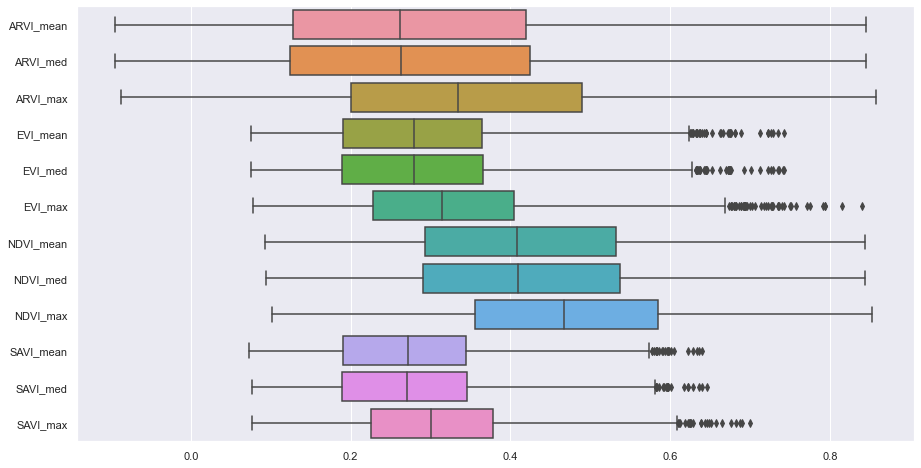

In [10]:
sampledatav3 = pd.concat(map(pd.read_csv, ['SRER21_dataset_v1.csv', 'SRER_2017_training_bi.csv']), ignore_index=True)
sampledatav3.isnull().sum()
sampledatav3.dropna(axis=0,inplace=True)
sampledatav3.rename({"OID_":"a"}, axis="columns", inplace=True)
sampledatav3.drop(["a"], axis=1, inplace=True)
sampledatav3.rename({"Id":"b"}, axis="columns", inplace=True)
sampledatav3.drop(["b"], axis=1, inplace=True)
sampledatav3.rename({"gridcode":"c"}, axis="columns", inplace=True)
sampledatav3.drop(["c"], axis=1, inplace=True)
sampledatav3.rename({"Shape_Length":"d"}, axis="columns", inplace=True)
sampledatav3.drop(["d"], axis=1, inplace=True)
sampledatav3.rename({"Shape_Area":"e"}, axis="columns", inplace=True)
sampledatav3.drop(["e"], axis=1, inplace=True)
sampledatav3.rename({"CH_mean":"f"}, axis="columns", inplace=True)
sampledatav3.drop(["f"], axis=1, inplace=True)

sns.boxplot(data=sampledatav3, orient="h")